In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [2]:
def load(file_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    # Include only apartment property type
    mask_apt = df["property_type"] == "apartment"
    # Include only prices less than $500,00
    mask_price = df["price_aprox_usd"] < 500_000
    # Ensures that these changes are done to the dataframe
    df = df[mask_ba & mask_apt & mask_price]
    
    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]
    
    # Return the dataframe
    return df

# The file path
file_path = (r"C:\Users\user222\OneDrive\Documents\Data Analysis\WQU\Datasets\Buenos Aires\buenos-aires-real-estate-1.csv")

In [3]:
df = load(file_path)
print("df shape:", df.shape)
df.head()

df shape: (1371, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


Text(0.5, 1.0, 'Distribution of Apartment Sizes')

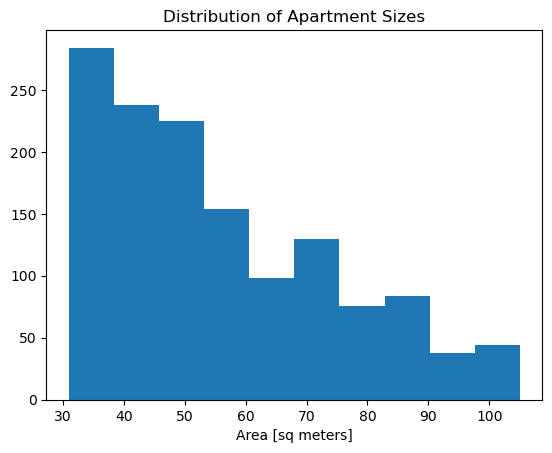

In [4]:
# Histogram of surface area covered in meter squared
plt.hist(df["surface_covered_in_m2"])

# X-axis label
plt.xlabel("Area [sq meters]")

# Plot title
plt.title("Distribution of Apartment Sizes")

In [5]:
# Calculating summary statistics using the describe method
df.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.371000e+03,1.371000e+03,1371.000000,987.000000,1371.000000,949.000000,1371.000000,387.000000,1104.000000,360.000000
mean,2.224641e+05,2.111642e+06,139268.305908,61.186424,55.851933,2272.562259,4277.784551,11.012920,2.384964,1959.630556
std,4.113629e+05,1.002720e+06,66132.001187,28.649021,18.938489,744.309904,7914.539590,49.627653,0.913975,1302.029958
min,2.727900e+04,4.136151e+05,27279.000000,0.000000,31.000000,513.513514,808.148936,1.000000,1.000000,1.000000
25%,9.400000e+04,1.394941e+06,92000.000000,43.000000,40.000000,1826.086957,1977.998065,2.000000,2.000000,1100.000000
50%,1.290000e+05,1.864975e+06,123000.000000,55.000000,50.000000,2150.000000,2416.666667,4.000000,2.000000,1685.000000
75%,1.770000e+05,2.501796e+06,165000.000000,76.000000,70.000000,2587.719298,2989.437013,7.000000,3.000000,2619.500000
max,5.487000e+06,7.505388e+06,495000.000000,278.000000,105.000000,11942.857140,57156.250000,616.000000,6.000000,7800.000000


Text(0.5, 1.0, 'Surface covered in meter square vs Price')

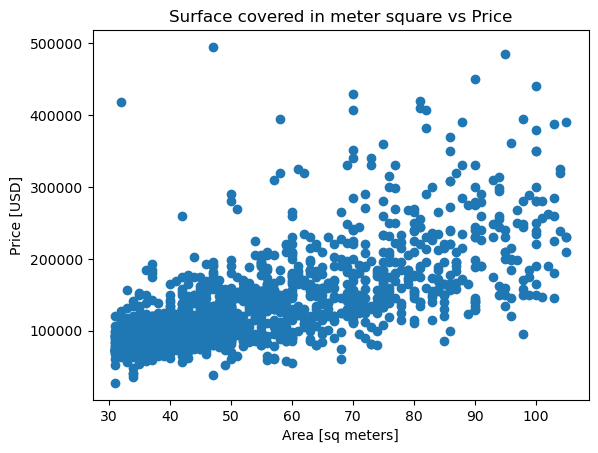

In [6]:
# Scatter plot of surface covered and price
plt.scatter(df["surface_covered_in_m2"], df["price_aprox_usd"])
# X-axis label
plt.xlabel("Area [sq meters]")
# Y-axis label
plt.ylabel("Price [USD]")
# Title
plt.title("Surface covered in meter square vs Price")

In [7]:
# Feature matrix
features =  ["surface_covered_in_m2"]
X_train =  df[features]

# Target vector
target = "price_aprox_usd"
y_train = df[target]

In [8]:
# Baseline prediction of y_train
y_mean = y_train.mean()
y_mean

139268.30590809626

In [9]:
# A list that generates a prediction for each observation in the dataset 
y_pred_baseline = [y_mean] * len(y_train)

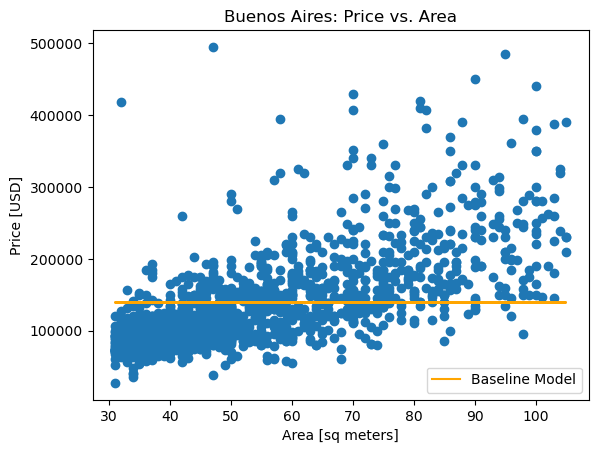

In [10]:
# Scatter plot of X_train vs y_train
plt.scatter(X_train, y_train)

# Add the baseline model line (y_pred_baseline)
plt.plot(X_train, y_pred_baseline, color='orange', label='Baseline Model')

# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")

# Add title
plt.title("Buenos Aires: Price vs. Area")

# Show legend
plt.legend();

In [11]:
# Calculate the baseline mean absolute error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 139268.31
Baseline MAE: 48756.9


In [12]:
model = LinearRegression()

In [13]:
# Fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Generating predictions
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([172527.84714326, 106704.92251907, 134914.74735801, 106704.92251907,
       125511.47241169])

In [15]:
# Calculating absolute mean error for our training
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 33402.03


In [16]:
# Importing a test data so the model can make predictions

X_test = pd.read_csv(r"C:\Users\user222\OneDrive\Documents\Data Analysis\WQU\Datasets\Buenos Aires\ba-test-data.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    118459.016202
1    137265.566095
2     87898.372626
3     87898.372626
4    106704.922519
dtype: float64

In [17]:
# Intercept
intercept = model.intercept_
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 7970.53558278564


In [18]:
# The coefficient for surface covered in m2
coefficient = model.coef_[0]
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2350.8187365781782


In [19]:
# Extract the intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_[0]

# Print the equation
print(f"Price (USD) = {coefficient:.2f} * Area (sq meters) + {intercept:.2f}")

Price (USD) = 2350.82 * Area (sq meters) + 7970.54


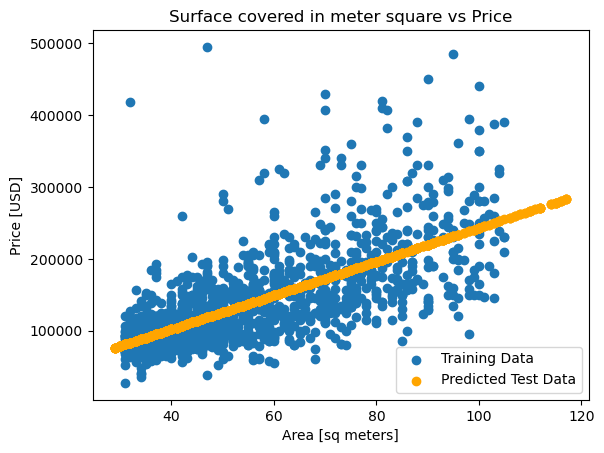

In [20]:
# overlaying the predicted prices from the test set on the scatter plot of the training 
# data to see if they follow a similar pattern.

plt.scatter(X_train["surface_covered_in_m2"], y_train, label='Training Data')
plt.scatter(X_test["surface_covered_in_m2"], y_pred_test, color='orange', label='Predicted Test Data')
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Surface covered in meter square vs Price")
plt.legend()
plt.show()